In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
from datasets import SingleImageDataset

In [61]:
img_path = 'data/jasper/jasper_ridge_224.mat'
gt_path = 'data/jasper/jasper_ridge_gt.mat'
start_band = 380; end_band = 2500
rgb_width = 64; rgb_height = 64
hsi_width = 32; hsi_height = 32
channels = [60, 61, 62, 63, 64, 65, 66, 67]
#channels = None
dataset = SingleImageDataset(channels,
                 img_path, gt_path,
                 start_band, end_band, 
                 rgb_width, rgb_height,
                 hsi_width, hsi_height)

In [62]:
import torch
from torch.utils.data import DataLoader

trainloader = DataLoader(dataset, batch_size=16, shuffle=True)
hsi_batch, rgb_batch, gt_batch = next(iter(trainloader))

In [63]:
print(hsi_batch.shape, rgb_batch.shape, gt_batch.shape)

torch.Size([16, 8, 32, 32]) torch.Size([16, 3, 64, 64]) torch.Size([16, 4, 64, 64])


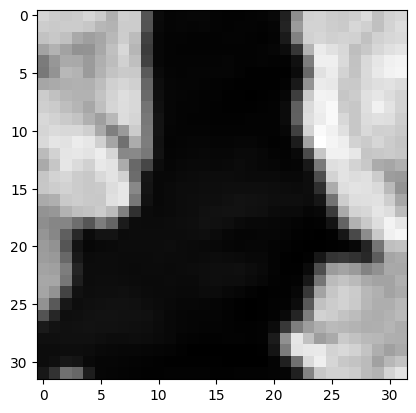

In [64]:
import numpy as np
plt.imshow(hsi_batch[3][1, :, :], cmap="gray")
plt.show()

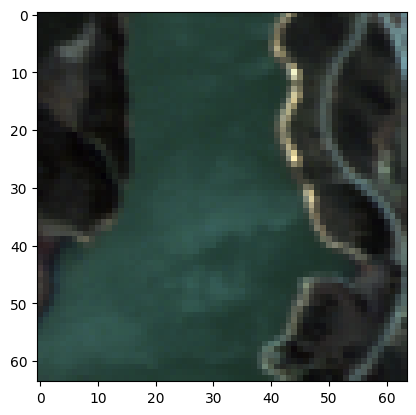

In [65]:
plt.imshow(torch.moveaxis(rgb_batch[2], 0, 2))
plt.show()

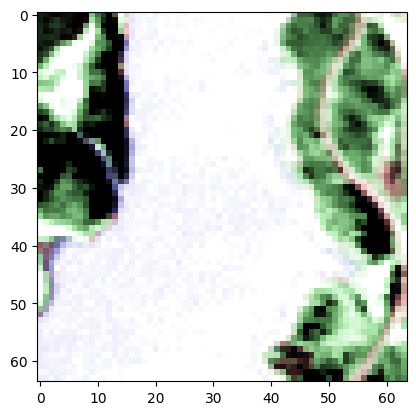

In [66]:
plt.imshow(torch.moveaxis(gt_batch[2], 0, 2))
plt.show()

In [67]:
import torch.optim as optim
from neural_nets.siamese_unet import SiameseUNet
from neural_nets.ca_siamese_unet import CASiameseUNet
from train_utils import main_training_loop
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
net = CASiameseUNet(8, 3, 256, 4).to(torch.double).to(DEVICE)
# SiameseUNet(8, 3, 256, 4).to(torch.double).to(DEVICE)
optimizer = optim.Adam(net.parameters(), lr=0.001)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 
                                                       mode='min', factor=0.5, patience=3)
main_training_loop(trainloader, net, optimizer, scheduler,
                 num_epochs=10, device=DEVICE, log_interval=40)

Epoch: 1 

69it [00:18,  3.79it/s]


loss:0.006210327841487101
saved
Epoch: 2 

69it [00:19,  3.60it/s]


Epoch: 3 

69it [00:18,  3.75it/s]


saved
Epoch: 4 

69it [00:18,  3.75it/s]


saved
Epoch: 5 

69it [00:18,  3.75it/s]


Epoch: 6 

69it [00:18,  3.77it/s]


Epoch: 7 

69it [00:18,  3.77it/s]


saved
Epoch: 8 

69it [00:18,  3.74it/s]


Epoch: 9 

69it [00:18,  3.77it/s]


Epoch: 10 

69it [00:18,  3.76it/s]


saved
Done


In [68]:
from train_utils import test
model_path = 'models/trained_model.pth'
trained_net = CASiameseUNet(8, 3, 256, 4).to(torch.double).to(DEVICE)
testloader = DataLoader(dataset, batch_size=16, shuffle=True)
mIOU = test(testloader, trained_net, model_path, num_classes=4)

In [69]:
print(mIOU)

(array([0.22101088, 0.23016354, 0.513844  , 0.23968542], dtype=float32), array(0.48693913, dtype=float32))
